<a href="https://colab.research.google.com/github/astitwa-agarwal12/Fake-News-Prediction/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:
df=df.dropna()

In [ ]:
messages = df.copy()
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [ ]:
y=messages['label']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:20]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


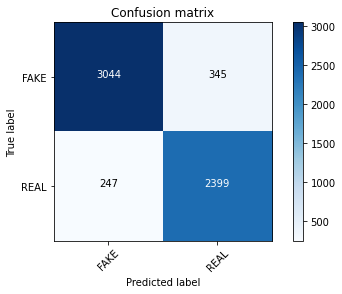

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score


0.9019055509527755

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_jobs=50)

accuracy:   0.922
Confusion matrix, without normalization


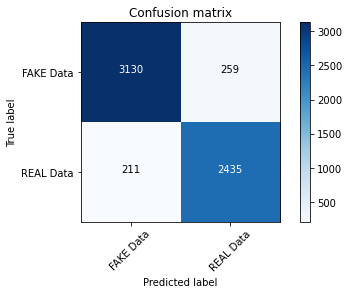

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
y=messages['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [ ]:
tfidf_v.get_feature_names()[:20]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [ ]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

accuracy:   0.882
Confusion matrix, without normalization


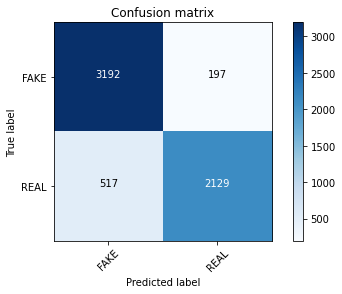

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score


0.8816901408450705

In [ ]:
hs_vectorizer=HashingVectorizer(n_features=5000)
X=hs_vectorizer.fit_transform(corpus).toarray()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.702
Confusion matrix, without normalization


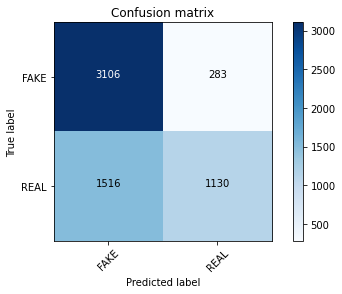

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
classifier=MultinomialNB()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
voc_size=5000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
onehot_repr

[[2172, 3632, 3537, 4412, 2940, 2512, 3298, 1895, 245, 370],
 [1484, 2396, 4369, 4311, 4166, 30, 714],
 [3616, 4985, 1970, 1150],
 [1513, 2945, 3485, 1385, 745, 2978],
 [2749, 4166, 2362, 4412, 983, 768, 4166, 4710, 3253, 4701],
 [1333,
  1035,
  4199,
  757,
  3443,
  4274,
  4379,
  2239,
  4501,
  3152,
  2069,
  3600,
  32,
  209,
  714],
 [3351, 2049, 1870, 2319, 2288, 2047, 3736, 2042, 2379, 3316, 1113],
 [440, 1718, 2130, 1099, 4151, 2749, 4274, 1120, 2379, 3316, 1113],
 [4393, 3858, 1508, 1545, 2116, 4431, 4048, 1271, 4274, 4364],
 [4525, 3997, 3840, 1450, 4499, 2697, 1165, 2492],
 [4722, 2967, 2562, 1686, 2016, 4014, 4752, 2198, 2268, 2253, 4444],
 [1385, 4535, 2940, 4431, 4274, 4151],
 [180, 2643, 2674, 3357, 4434, 2655, 2698, 2531, 2706],
 [2451, 1783, 3610, 1080, 1080, 1864, 2165, 2379, 3316, 1113],
 [3303, 853, 4581, 606, 630, 2379, 3316, 1113],
 [310, 1001, 338, 1341, 1271, 2275, 1873, 3726, 467, 3618],
 [1293, 1136, 2396],
 [3126, 4193, 1031, 2985, 4274, 2917, 313, 714],

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1895  245  370]
 [   0    0    0 ... 4166   30  714]
 [   0    0    0 ... 4985 1970 1150]
 ...
 [   0    0    0 ... 2379 3316 1113]
 [   0    0    0 ... 1837 4401 4931]
 [   0    0    0 ... 1281 2705 4086]]


In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)


In [ ]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 38s 14ms/step - loss: 0.3126 - accuracy: 0.8497 - val_loss: 0.1917 - val_accuracy: 0.9206
Epoch 2/10
192/192 [==============================] - 2s 11ms/step - loss: 0.1364 - accuracy: 0.9475 - val_loss: 0.2100 - val_accuracy: 0.9173
Epoch 3/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0950 - accuracy: 0.9654 - val_loss: 0.2073 - val_accuracy: 0.9201
Epoch 4/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0677 - accuracy: 0.9754 - val_loss: 0.2428 - val_accuracy: 0.9168
Epoch 5/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0421 - accuracy: 0.9849 - val_loss: 0.3108 - val_accuracy: 0.9140
Epoch 6/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.3925 - val_accuracy: 0.9090
Epoch 7/10
192/192 [==============================] - 3s 13ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.4246 - val_accuracy: 0.913

In [ ]:
y_pred1=model1.predict(X_test)

189/189 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1.round())

array([[3112,  307],
       [ 233, 2383]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1.round())

0.9105219552609777

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1.round()))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.89      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 4s 10ms/step - loss: 0.3346 - accuracy: 0.8466 - val_loss: 0.1933 - val_accuracy: 0.9170
Epoch 2/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1395 - accuracy: 0.9463 - val_loss: 0.1914 - val_accuracy: 0.9228
Epoch 3/10
192/192 [==============================] - 1s 8ms/step - loss: 0.1011 - accuracy: 0.9602 - val_loss: 0.2506 - val_accuracy: 0.9198
Epoch 4/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0765 - accuracy: 0.9718 - val_loss: 0.2276 - val_accuracy: 0.9147
Epoch 5/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9828 - val_loss: 0.3640 - val_accuracy: 0.9152
Epoch 6/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.2578 - val_accuracy: 0.9150
Epoch 7/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.3742 - val_accuracy: 0.9065
Epoch

In [ ]:
y_pred=model.predict(X_test)

189/189 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.round())

array([[3138,  281],
       [ 265, 2351]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred.round())

0.9095277547638774

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.89      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [ ]:
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 4s 10ms/step - loss: 0.3376 - accuracy: 0.8386 - val_loss: 0.2503 - val_accuracy: 0.9070
Epoch 2/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1484 - accuracy: 0.9423 - val_loss: 0.1972 - val_accuracy: 0.9225
Epoch 3/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1086 - accuracy: 0.9605 - val_loss: 0.2186 - val_accuracy: 0.9193
Epoch 4/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0842 - accuracy: 0.9690 - val_loss: 0.2259 - val_accuracy: 0.9132
Epoch 5/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0636 - accuracy: 0.9768 - val_loss: 0.2508 - val_accuracy: 0.9170
Epoch 6/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0476 - accuracy: 0.9833 - val_loss: 0.3188 - val_accuracy: 0.9148
Epoch 7/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.3605 - val_accuracy: 0.9150
Epoch

In [ ]:
y_pred2=model2.predict(X_test)

189/189 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred2.round())

array([[3126,  293],
       [ 256, 2360]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2.round())

0.9090306545153273

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2.round()))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

